# Police Shootings and Race

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install prince
import prince
%matplotlib inline

In [2]:
data = pd.read_csv("shootings.csv")
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [6]:
df = ['age','gender','race']
descriptor_data = data[df]
descriptor_data.head()

,age,gender,race
0,53.0,M,Asian
1,47.0,M,White
2,23.0,M,Hispanic
3,32.0,M,White
4,39.0,M,Hispanic


In [ ]:

famd = prince.FAMD(n_components =2, n_iter = 3,copy = True,check_input = True, engine = 'auto', random_state =42)

In [ ]:
famd = famd.fit(descriptor_data)

In [ ]:
scaled_desc_data = famd.row_coordinates(descriptor_data)
scaled_desc_data.head()

,0,1
0,81.753685,22.716881
1,127.759997,-46.332227
2,93.291024,43.989242
3,127.759610,-46.326796
4,93.291436,43.983449


In [ ]:
descriptor_data[(scaled_desc_data[1] >70) ]

,age,gender,race
9,47.0,M,Black
11,31.0,M,Black
12,41.0,M,Black
14,37.0,M,Black
17,36.0,M,Black
...,...,...,...
4883,24.0,M,Black
4886,38.0,M,Black
4889,62.0,M,Black
4890,27.0,M,Black


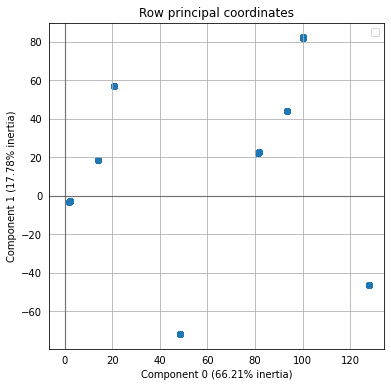

In [ ]:
ax = famd.plot_row_coordinates(descriptor_data, 
                               ax =None, 
                               figsize=(6,6), 
                               x_component=0, 
                               y_component=1,
                              ellipse_outline=False,
                              ellipse_fill=True,
                              show_points=True)


The FAMD analysis also shows that the X axis comprises of 66% of the weight, effectively showing that 66% of how a person gets classified in the data is based on race. This is surprising because it shows that race is a more descriptive indicator than age, which one would imagine is important in determining if a person gets shot.

In [3]:
unarmed = data[data['arms_category'] == 'Unarmed']
armed = data[data['arms_category'] == 'Armed']

In [ ]:
#percentage difference of black people being shot when armed vs unarmed
print(armed[armed['race'] == 'Black'].shape[0]/armed.shape[0] - unarmed[unarmed['race'] == 'Black'].shape[0]/unarmed.shape[0])
#percentage difference of white people being shot when armed vs unarmed
print(armed[armed['race'] == 'White'].shape[0]/armed.shape[0] - unarmed[unarmed['race'] == 'White'].shape[0]/unarmed.shape[0])

I found that, although white people are killed in larger numbers overall, when the suspect is armed, black people are 9.5% more likely to be shot and killed, wheras white people is 9.6% less likely to be killed 

In [ ]:
p_unarmed = unarmed[unarmed['race'] == 'Black'].shape[0]/unarmed.shape[0]
p_armed = armed[armed['race'] == 'Black'].shape[0]/armed.shape[0]
z = (p_armed - p_unarmed)/np.sqrt((p_unarmed * (1-p_unarmed))/armed[armed['race'] == 'Black'].shape[0])
print(z)

The Z score translates to a p-value of 0.00842 which is below the usual threshold of 0.05 which shows that this value is statistically significant.